In [5]:
import pandas as pd

colesterol = pd.read_csv('https://gist.githubusercontent.com/davidneves11/01b2963f7a8dfd87d79010fbf847b221/raw/685870f4365bcda4e5bb9e342285e0aac37dd556/colesterol.csv')
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


<AxesSubplot:xlabel='pressao_sanguinea_repouso', ylabel='colesterol'>

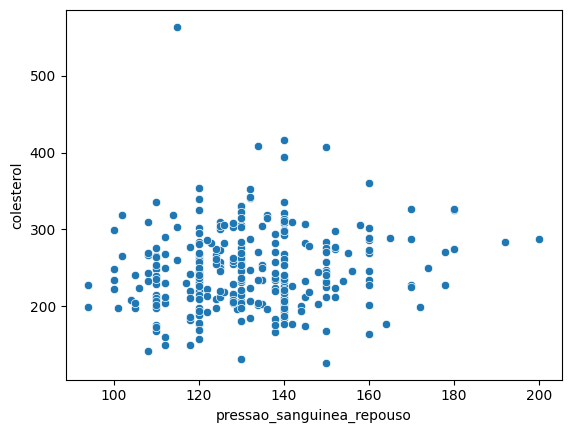

In [6]:
import seaborn as sns

sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 9)

In [8]:
x = colesterol.select_dtypes('int64')

In [9]:
kmeans.fit(x)
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

<AxesSubplot:xlabel='pressao_sanguinea_repouso', ylabel='colesterol'>

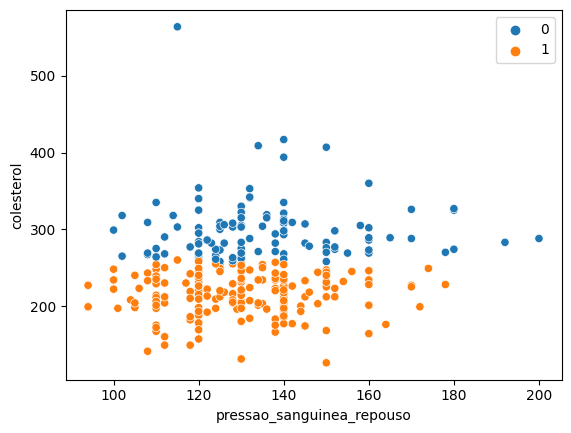

In [10]:
sns.scatterplot(x='pressao_sanguinea_repouso', y='colesterol', data= colesterol, hue = kmeans.labels_)

In [11]:
colesterol['clusters'] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,1
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,1
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,1
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,1


In [12]:
colesterol.groupby('clusters')['colesterol'].mean()

clusters
0    298.963964
1    216.473958
Name: colesterol, dtype: float64